# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, RocCurveDisplay

# Import Dataset

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# Exploratory Data Analysis (EDA)

In [3]:
df_main = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [4]:
df.shape

(10000, 21)

In [5]:
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [6]:
categorical_data = df.select_dtypes(include=['object'])
continuos_data = df.select_dtypes(include=['int64','float64'])

print("Categorical Data Columns:")
i = 1

for col in categorical_data.columns:
    print(str(i) + '.' + col)
    i += 1
i = 1
print("\nContinuos Data Columns:")
for col in continuos_data.columns:
    print(str(i) + '.' + col)
    i += 1

Categorical Data Columns:
1.Gender
2.Exercise Habits
3.Smoking
4.Family Heart Disease
5.Diabetes
6.High Blood Pressure
7.Low HDL Cholesterol
8.High LDL Cholesterol
9.Alcohol Consumption
10.Stress Level
11.Sugar Consumption
12.Heart Disease Status

Continuos Data Columns:
1.Age
2.Blood Pressure
3.Cholesterol Level
4.BMI
5.Sleep Hours
6.Triglyceride Level
7.Fasting Blood Sugar
8.CRP Level
9.Homocysteine Level


In [7]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
Age,9971.000000,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.000000,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.000000,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.000000,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.000000,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.000000,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.000000,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.000000,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.000000,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Gender,9981,2,Male,5003
Exercise Habits,9975,3,High,3372
Smoking,9975,2,Yes,5123
Family Heart Disease,9979,2,No,5004
Diabetes,9970,2,No,5018
High Blood Pressure,9974,2,Yes,5022
Low HDL Cholesterol,9975,2,Yes,5000
High LDL Cholesterol,9974,2,No,5036
Alcohol Consumption,7414,3,Medium,2500
Stress Level,9978,3,Medium,3387


In [9]:
# Check for Duplicates
if df.duplicated().any():
    print("Duplicate data exists in dtatset")
else:
    print("No Duplicate data found in the dataset")

No Duplicate data found in the dataset


In [10]:
df.isnull().sum().sort_values(ascending=False)

Alcohol Consumption     2586
Diabetes                  30
Sugar Consumption         30
Cholesterol Level         30
Age                       29
Triglyceride Level        26
CRP Level                 26
High LDL Cholesterol      26
High Blood Pressure       26
Low HDL Cholesterol       25
Sleep Hours               25
Exercise Habits           25
Smoking                   25
Fasting Blood Sugar       22
BMI                       22
Stress Level              22
Family Heart Disease      21
Homocysteine Level        20
Blood Pressure            19
Gender                    19
Heart Disease Status       0
dtype: int64

In [11]:
# Print the different value counts of each categorical columns
for col in categorical_data:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Gender value counts:
Gender
Male      5003
Female    4978
Name: count, dtype: int64

Exercise Habits value counts:
Exercise Habits
High      3372
Medium    3332
Low       3271
Name: count, dtype: int64

Smoking value counts:
Smoking
Yes    5123
No     4852
Name: count, dtype: int64

Family Heart Disease value counts:
Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

Diabetes value counts:
Diabetes
No     5018
Yes    4952
Name: count, dtype: int64

High Blood Pressure value counts:
High Blood Pressure
Yes    5022
No     4952
Name: count, dtype: int64

Low HDL Cholesterol value counts:
Low HDL Cholesterol
Yes    5000
No     4975
Name: count, dtype: int64

High LDL Cholesterol value counts:
High LDL Cholesterol
No     5036
Yes    4938
Name: count, dtype: int64

Alcohol Consumption value counts:
Alcohol Consumption
Medium    2500
Low       2488
High      2426
Name: count, dtype: int64

Stress Level value counts:
Stress Level
Medium    3387
Low       3320
High      32

In [12]:
# Print the different value counts of each continous columns
for col in continuos_data:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Age value counts:
Age
71.0    187
64.0    185
34.0    182
43.0    182
62.0    181
       ... 
67.0    140
60.0    139
24.0    132
44.0    128
48.0    121
Name: count, Length: 63, dtype: int64

Blood Pressure value counts:
Blood Pressure
134.0    214
167.0    195
171.0    182
142.0    181
170.0    181
        ... 
176.0    143
179.0    140
131.0    140
130.0    136
156.0    132
Name: count, Length: 61, dtype: int64

Cholesterol Level value counts:
Cholesterol Level
292.0    91
186.0    84
288.0    83
185.0    83
193.0    81
         ..
271.0    51
239.0    49
157.0    49
169.0    47
218.0    46
Name: count, Length: 151, dtype: int64

BMI value counts:
BMI
24.991591    1
25.221799    1
29.855447    1
24.130477    1
20.486289    1
            ..
18.788791    1
31.856801    1
26.899911    1
34.964026    1
25.111295    1
Name: count, Length: 9978, dtype: int64

Sleep Hours value counts:
Sleep Hours
7.633228    1
8.744034    1
4.440440    1
5.249405    1
7.030971    1
           ..
6.834954

# Data Visualization

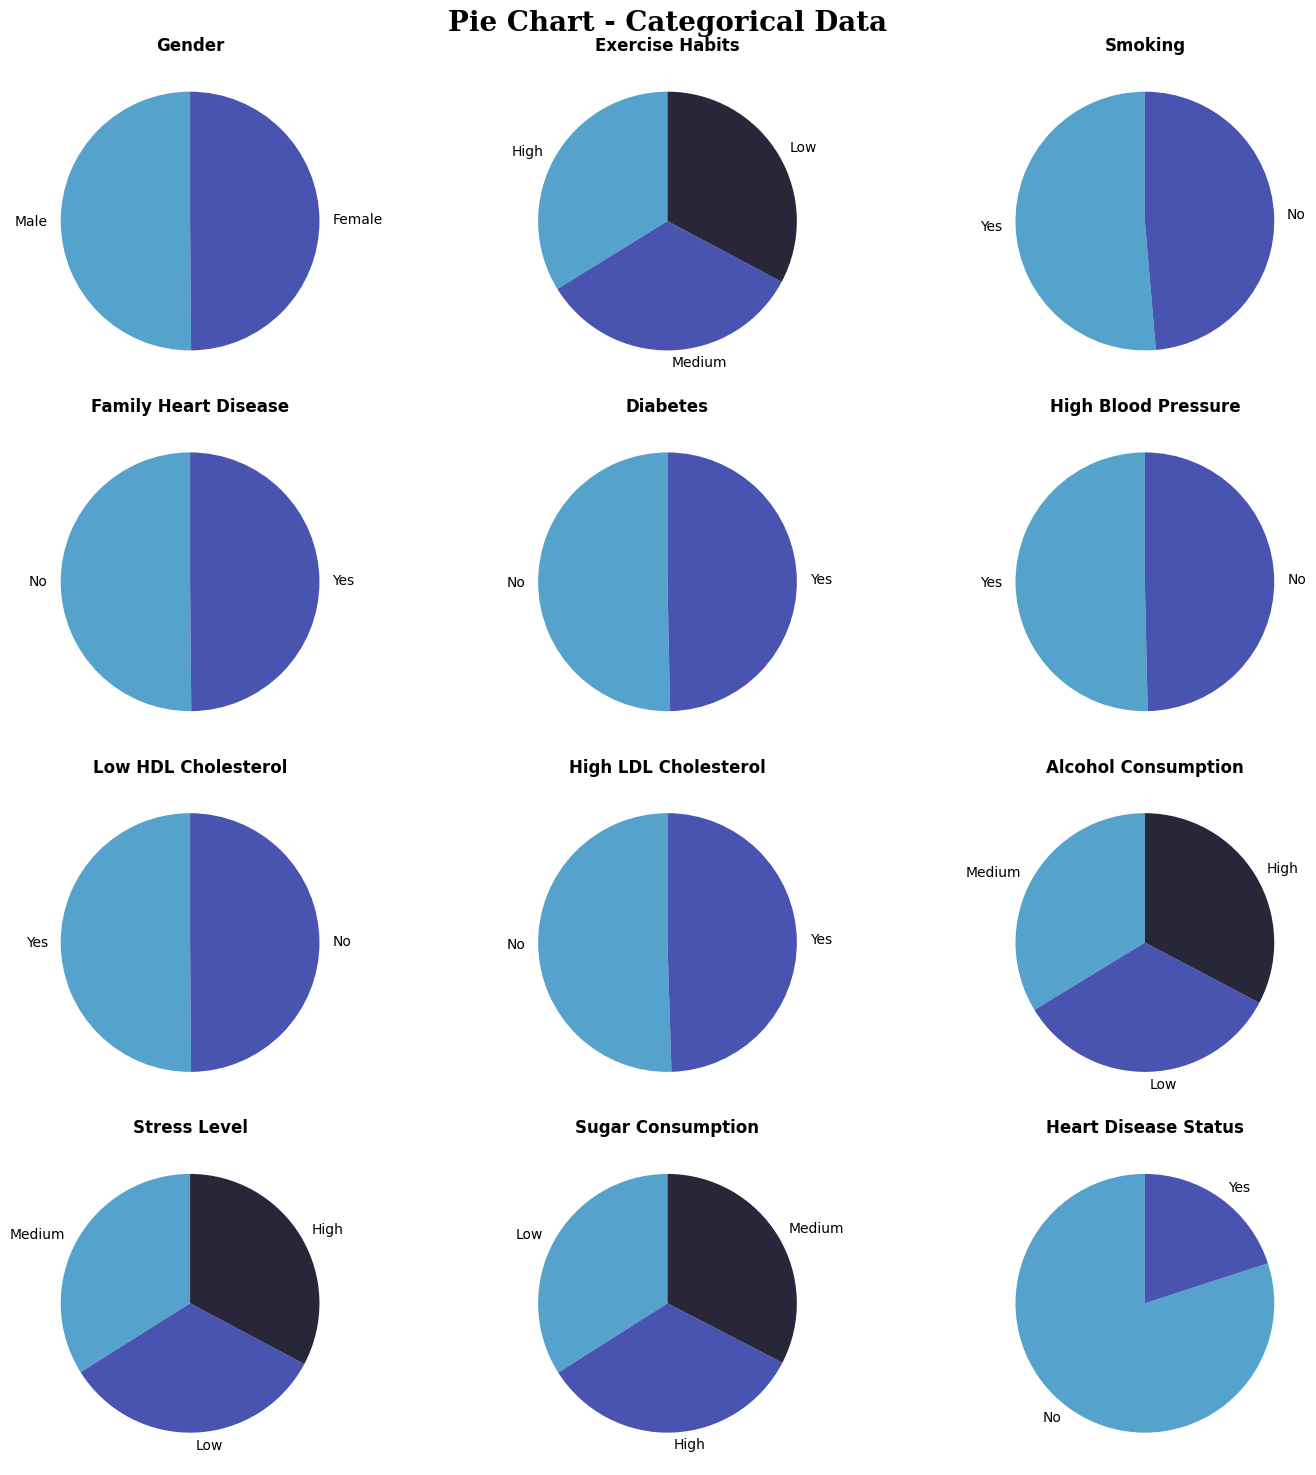

In [13]:
# Pie Chart for Categorical Data

fig,axes = plt.subplots(4,3,figsize=(15,15))
axes = axes.flatten()

for i,var in enumerate(df[categorical_data.columns]):
    color_pallette = sns.color_palette('icefire')
    counts = df[categorical_data.columns][var].value_counts()
    
    axes[i].pie(counts,labels = counts.index,colors = color_pallette,startangle = 90)
    axes[i].set_title(var,fontweight = 'bold')

fig.suptitle(
    "Pie Chart - Categorical Data",
    fontsize = 20,
    fontweight = 'bold',
    fontfamily='serif',
)
plt.tight_layout()
plt.show()

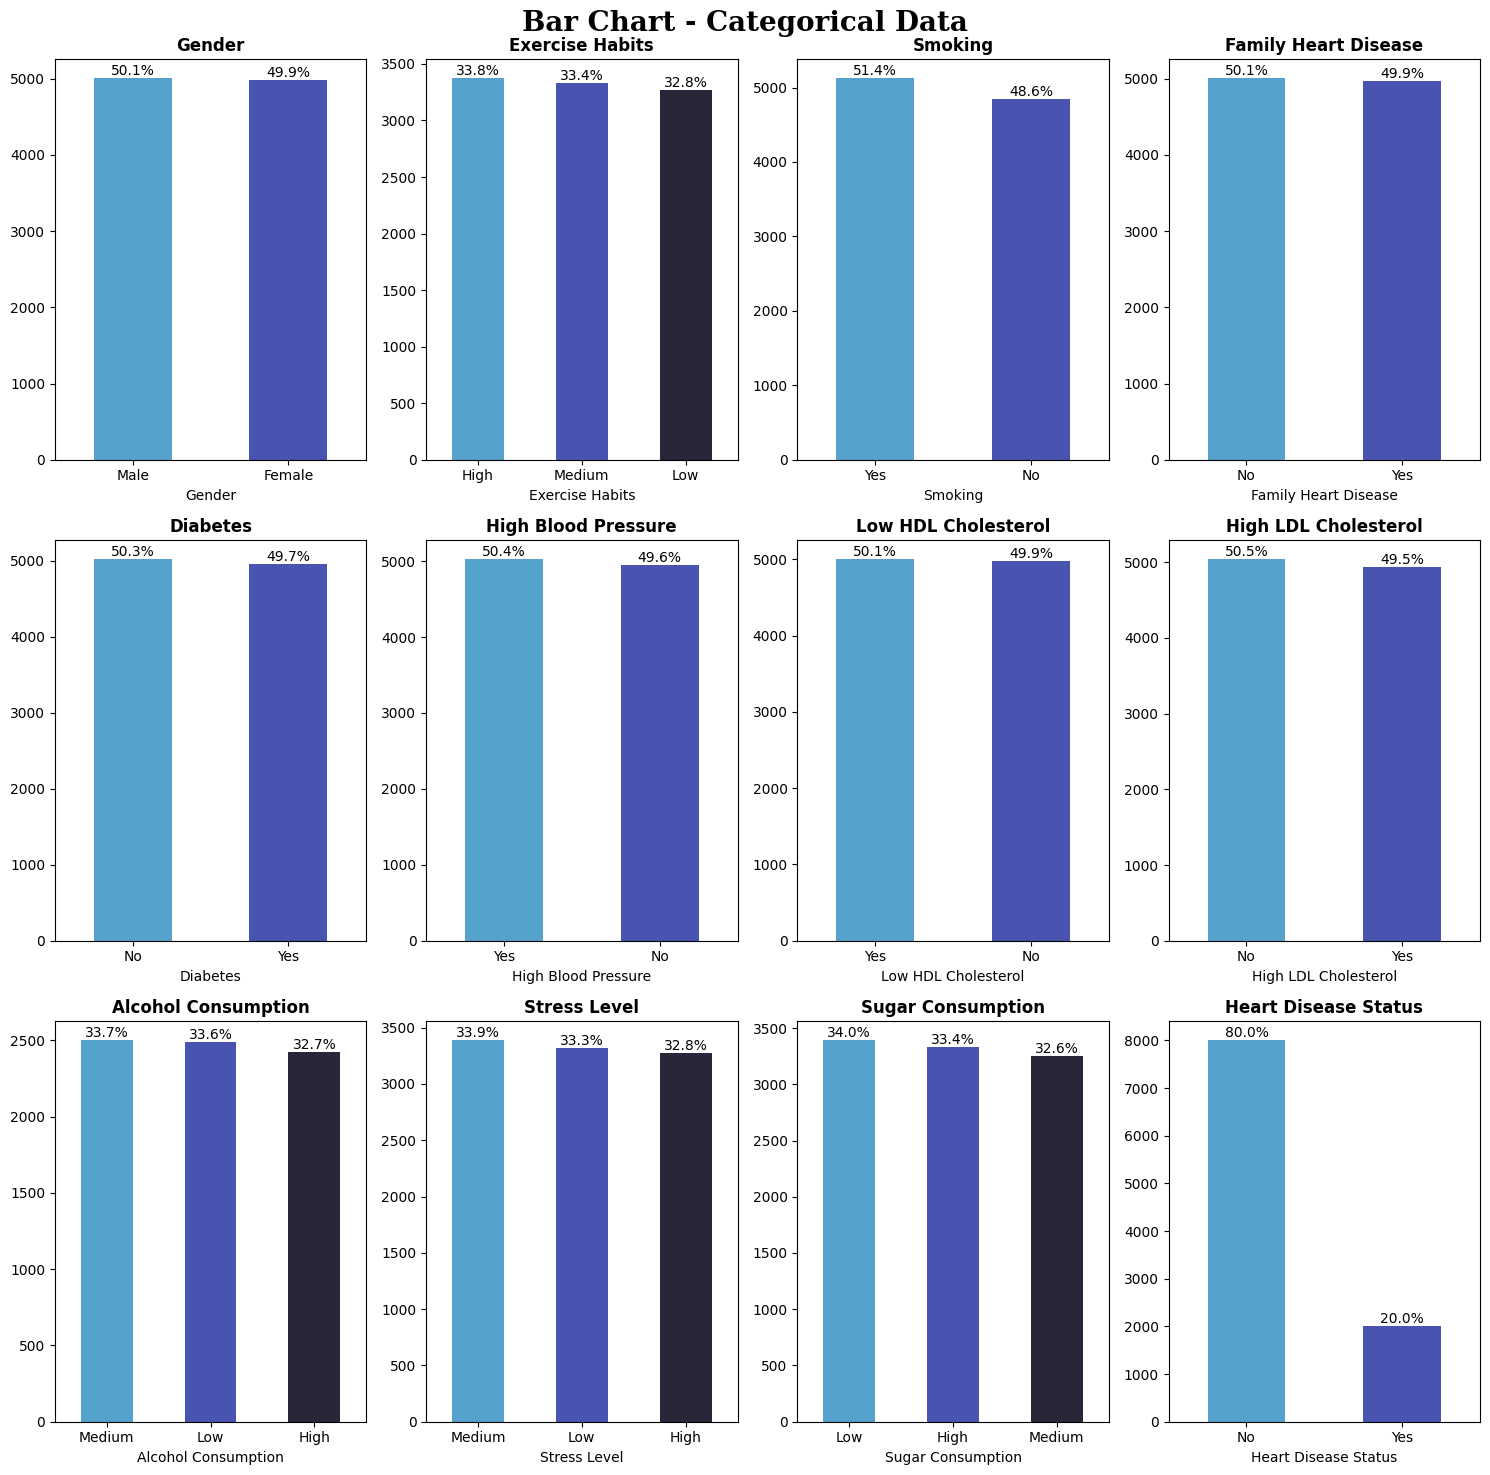

In [14]:
# Bar Chart for Categorical Data

fig,axs = plt.subplots(3,4,figsize=(15,15))
axs = axs.flatten()
color_pallette = sns.color_palette('icefire')

for i,column in enumerate(categorical_data.columns):
    value_counts = df[column].value_counts()
    ax = value_counts.plot(kind='bar',ax=axs[i],color=color_pallette)
    axs[i].set_title(column,fontweight = 'bold')
    axs[i].tick_params(axis='x',rotation=0)
    
    # Percentage
    total = value_counts.sum()
    for p in ax.patches:
        percent = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percent,(x,y),ha = 'center',va = 'bottom')
    
    fig.suptitle(
        "Bar Chart - Categorical Data",
        fontsize = 20,
        fontweight = 'bold',
        fontfamily = 'serif'
    )
    
plt.tight_layout()
plt.show()

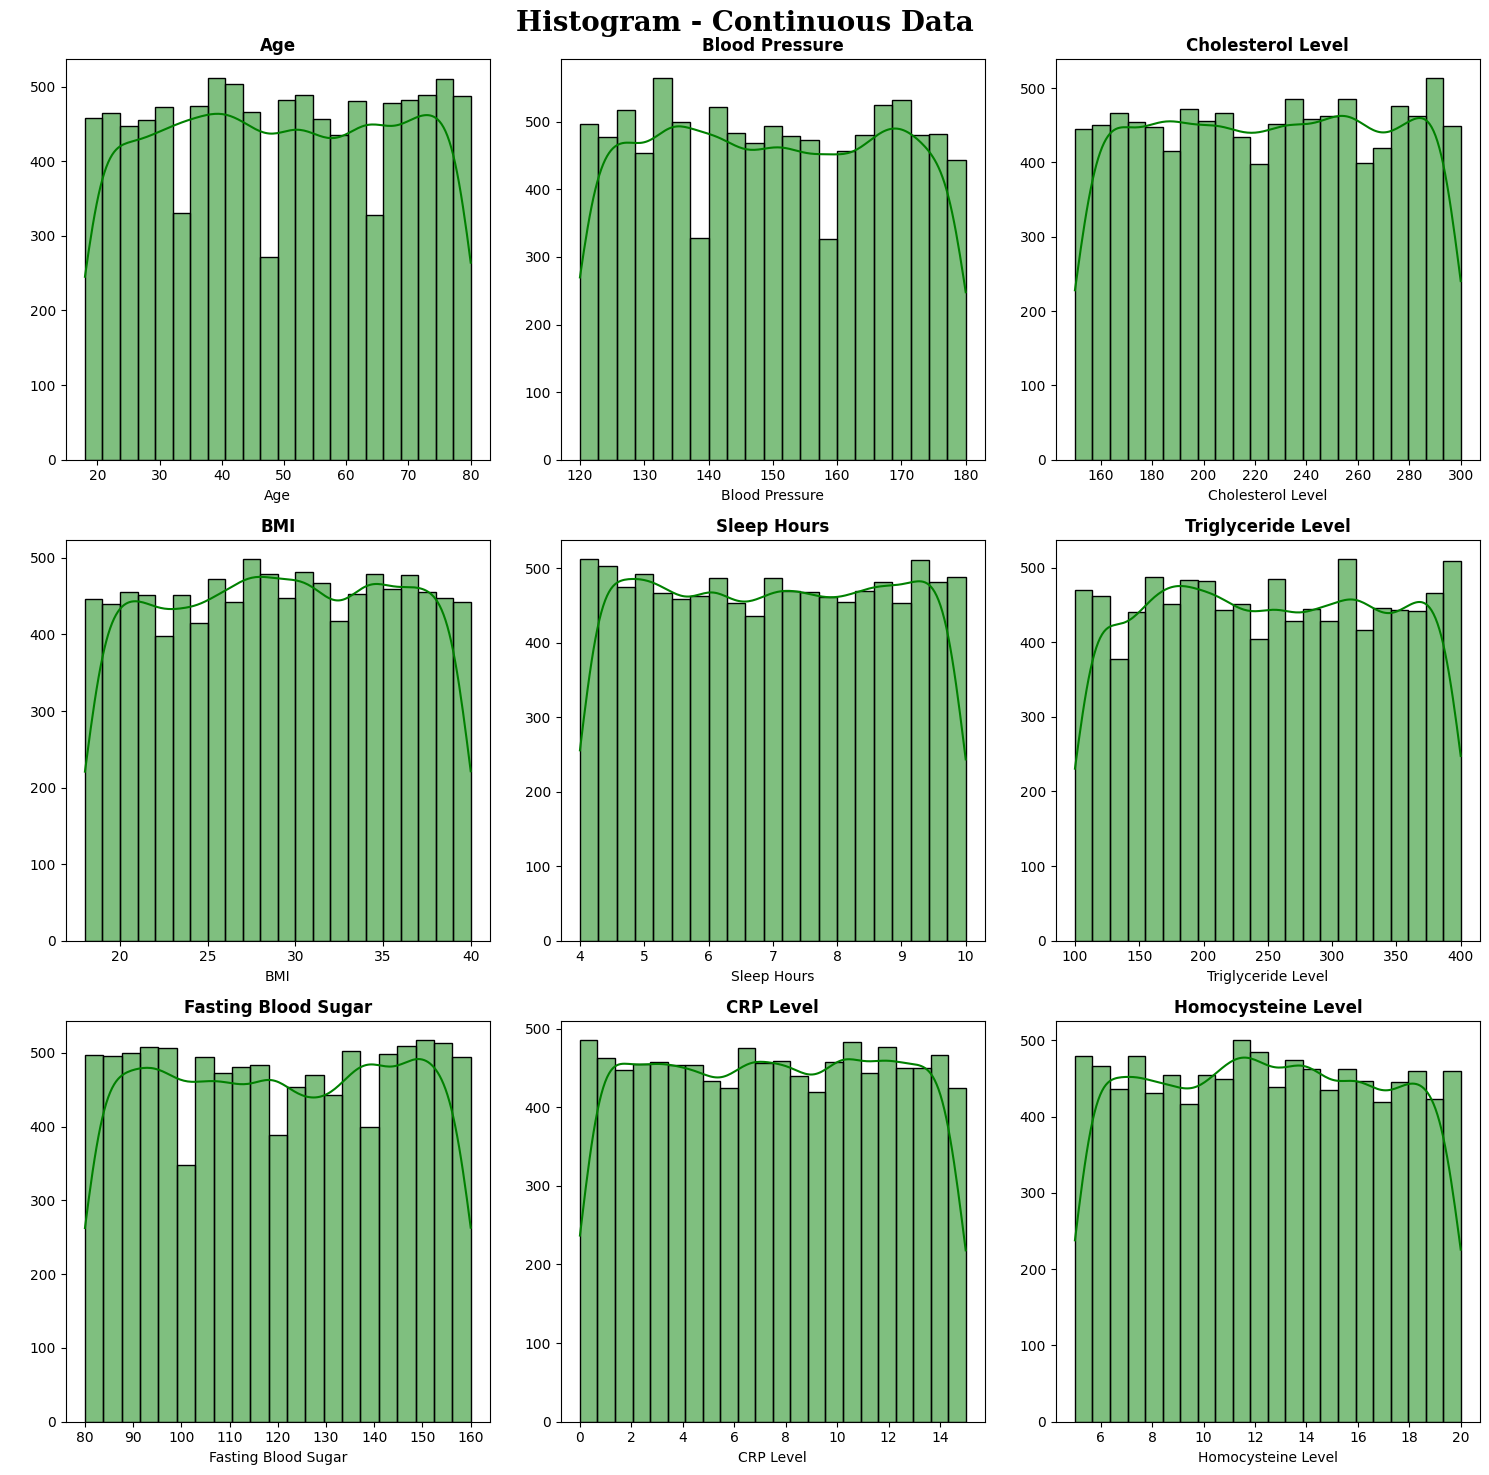

In [15]:
# Histogram for Continuous Data

fig,axs = plt.subplots(3,3,figsize=(15,15))
axs = axs.flatten()

for i,column in enumerate(continuos_data.columns):
    ax = sns.histplot(df[column], ax=axs[i],kde=True,color='green')
    axs[i].set_title(column,fontweight = 'bold')
    axs[i].set_ylabel(' ')
    
    fig.suptitle(
        "Histogram - Continuous Data",
        fontsize = 20,
        fontweight = 'bold',
        fontfamily='serif'
    )
plt.tight_layout()
plt.show()

# Data Pre-Processing

In [16]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [17]:
encoder = LabelEncoder()

for col in categorical_data:
    df[col] = encoder.fit_transform(df[col])
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,0,1,1,0,24.991591,1,...,0,0,2,7.633228,2,342.0,NaN,12.969246,12.387250,0
1,69.0,0,146.0,286.0,0,0,1,1,25.221799,0,...,0,2,0,8.744034,2,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,1,0,0,0,29.855447,0,...,1,1,1,4.440440,1,393.0,92.0,12.709873,11.230926,0
3,32.0,0,122.0,293.0,0,1,1,0,24.130477,1,...,1,1,0,5.249405,0,293.0,94.0,12.509046,5.961958,0
4,60.0,1,166.0,242.0,1,1,1,1,20.486289,1,...,0,1,0,7.030971,0,263.0,154.0,10.381259,8.153887,0


In [18]:
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df),columns=df.columns)
print(df_imputed)
df = df_imputed

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
0     56.0     1.0           153.0              155.0              0.0   
1     69.0     0.0           146.0              286.0              0.0   
2     46.0     1.0           126.0              216.0              1.0   
3     32.0     0.0           122.0              293.0              0.0   
4     60.0     1.0           166.0              242.0              1.0   
...    ...     ...             ...                ...              ...   
9995  25.0     0.0           136.0              243.0              2.0   
9996  38.0     1.0           172.0              154.0              2.0   
9997  73.0     1.0           152.0              201.0              0.0   
9998  23.0     1.0           142.0              299.0              1.0   
9999  38.0     0.0           128.0              193.0              2.0   

      Smoking  Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0         1.0                 

In [19]:
df.nunique()

Age                        88
Gender                      3
Blood Pressure             76
Cholesterol Level         175
Exercise Habits             4
Smoking                     3
Family Heart Disease        3
Diabetes                    3
BMI                     10000
High Blood Pressure         3
Low HDL Cholesterol         3
High LDL Cholesterol        3
Alcohol Consumption         4
Stress Level                4
Sleep Hours             10000
Sugar Consumption           4
Triglyceride Level        320
Fasting Blood Sugar        97
CRP Level               10000
Homocysteine Level      10000
Heart Disease Status        2
dtype: int64

In [20]:
df.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [21]:
scaler = StandardScaler()
Grade_column = df['Heart Disease Status']
df_x = df.drop(columns=['Heart Disease Status'])
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns=df_x.columns)
df_scaled['Heart Disease Status'] = Grade_column.values
df_scaled

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,0.368255,0.984380,0.184329,-1.618014,-1.213535,0.956450,0.988338,-0.990586,-0.648386,0.975216,...,-0.987782,-1.362666,1.198269,0.366245,1.224141,1.049211,0.027954,1.268165,-0.015816,0.0
1,1.083591,-1.000657,-0.214341,1.391938,-1.213535,-1.025008,0.988338,0.985843,-0.611852,-1.004516,...,-0.987782,0.424906,-1.237237,1.000416,1.224141,-1.353772,1.564375,0.434590,1.584160,0.0
2,-0.182004,0.984380,-1.353399,-0.216433,-0.001212,-1.025008,-0.995082,-0.990586,0.123515,-1.004516,...,0.991741,-0.468880,-0.019484,-1.456550,0.002443,1.635585,-1.194393,1.208338,-0.283494,0.0
3,-0.952366,-1.000657,-1.581211,1.552775,-1.213535,0.956450,0.988338,-0.990586,-0.785047,0.975216,...,0.991741,-0.468880,-1.237237,-0.994704,-1.219255,0.485832,-1.109508,1.162015,-1.503211,0.0
4,0.588359,0.984380,0.924717,0.380962,-0.001212,0.956450,0.988338,0.985843,-1.363385,0.975216,...,-0.987782,-0.468880,-1.237237,0.022411,-1.219255,0.140907,1.437047,0.671218,-0.995800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.337547,-1.000657,-0.783870,0.403938,1.211110,0.956450,-0.995082,-0.990586,-1.632781,0.975216,...,0.991741,0.424906,-1.237237,-0.089498,1.224141,1.060708,0.545753,-0.895533,1.545531,1.0
9996,-0.622210,0.984380,1.266434,-1.640991,1.211110,-1.025008,-0.995082,-0.990586,0.441133,0.975216,...,0.991741,1.318691,-1.237237,0.717102,0.002443,1.451624,-1.576376,-1.110174,-0.634253,1.0
9997,1.303695,0.984380,0.127376,-0.561084,-1.213535,0.956450,-0.995082,0.985843,-0.345533,-1.004516,...,0.991741,1.318691,-0.019484,-1.458650,0.002443,-0.031556,-1.364163,-0.706379,-0.685940,1.0
9998,-1.447598,0.984380,-0.442153,1.690635,-0.001212,0.956450,-0.995082,0.985843,0.934255,0.975216,...,0.991741,0.424906,-1.237237,0.876126,1.224141,-1.583722,1.394605,-0.058968,-0.134748,1.0


Heart Disease Status
0.0    8000
1.0    2000
Name: count, dtype: int64


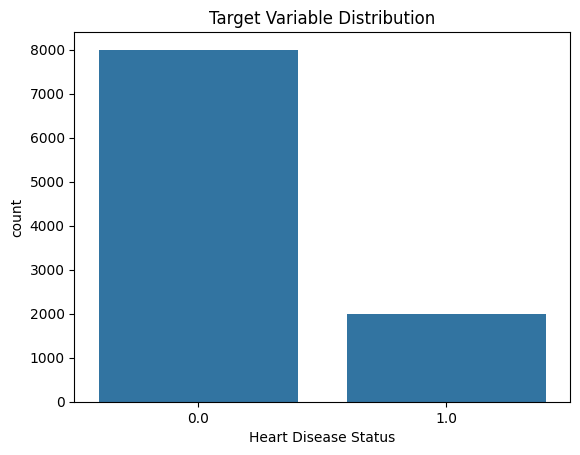

In [22]:
print(df['Heart Disease Status'].value_counts())
sns.countplot(x=df_scaled['Heart Disease Status'])
plt.title("Target Variable Distribution")
plt.show()

#### We can clearly see class imbalance where most samples belong to the no-disease (0) category. This imbalance can lead to a biased model favouring the majority class, reducing predictive performance for the minority class (heart disease cases) So, using pandas, we performed manual upsampling for class 1.0. We balanced the data using duplication. This ensures the model learns both classes equally, improving accuracy, recall, and F1-score for the minority class. Balancing the data prevents bias, making the model more reliable and effective in predicting both classes.

In [23]:
df_majority = df_scaled[df_scaled['Heart Disease Status'] == 0]
df_minority = df_scaled[df_scaled["Heart Disease Status"] == 1]

df_minority_unsample = df_minority.sample(n=int(len(df_majority) * 0.5),replace=True,random_state=42)
df_balance = pd.concat([df_majority,df_minority_unsample])
df_balance = df_balance.sample(frac=1,random_state=42)

df_balance['Heart Disease Status'].value_counts()

Heart Disease Status
0.0    8000
1.0    4000
Name: count, dtype: int64

In [24]:
X = df_balance.drop(columns=['Heart Disease Status'])
y = df_balance['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Developing Models

Logistic Regression

In [25]:
accuracy = {}

param_grid_lr = {
    "C":[0.1,1,10,100],
    "solver":["lbfgs","liblinear"]
}
lr = LogisticRegression(max_iter=3000,random_state=42)
grid_search_lr = GridSearchCV(lr,param_grid_lr,cv=5,scoring="accuracy")
grid_search_lr.fit(X_train,y_train)
accuracy["Logistic Regression"] = grid_search_lr.best_score_
best_lr = grid_search_lr.best_params_
best_lr.update({
    'max_iter': 3000,
    'random_state': 42
})
print("Best Parameters for Logistic Regression:",best_lr)
print("Best Accuracy:",accuracy["Logistic Regression"])

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs', 'max_iter': 3000, 'random_state': 42}
Best Accuracy: 0.6641666666666667


KNN

In [26]:
param_grid_knn = {
    "n_neighbors":[3,5,7,9],
    "weights": ["uniform","distance"]
}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn,param_grid_knn,cv=5,scoring="accuracy")
grid_search_knn.fit(X_train,y_train)
accuracy["KNN"] = grid_search_knn.best_score_
best_knn = grid_search_knn.best_params_
print("Best Parameters for KNN:",best_knn)
print("Best Accuracy:",accuracy['KNN'])

Best Parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
Best Accuracy: 0.8028124999999999


SVM

In [27]:
param_grid_svm = {
    "C":[0.1,1,10],
    "kernel":["linear","rbf"]
}
svm = SVC(random_state=42,max_iter=1000)
grid_search_svc = GridSearchCV(svm,param_grid_svm,cv=3,scoring="accuracy",verbose=1)
grid_search_svc.fit(X_train,y_train)
accuracy["SVM"] = grid_search_svc.best_score_
best_svm = grid_search_svc.best_params_
best_svm.update({
    'max_iter':1000,
    'random_state':42
})
print("Best Parameters for SVM:",best_svm)
print("Best Accuracy:",accuracy["SVM"])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for SVM: {'C': 10, 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 42}
Best Accuracy: 0.6301041666666666


Naive Bayes

In [28]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test,y_pred_nb)
accuracy["Naive Bayes"] = accuracy_nb
print("Naive Bayes Accuracy:",accuracy_nb)

Naive Bayes Accuracy: 0.6766666666666666


Decision Tree

In [29]:
param_grid_dt = {
    "max_depth":[5,10,20],
    "criterion":["gini","entropy"]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt,param_grid_dt,cv=5,scoring="accuracy")
grid_search_dt.fit(X_train,y_train)
accuracy["Decision Tree"] = grid_search_dt.best_score_
best_dt = grid_search_dt.best_params_
best_dt.update({
    'random_state': 42
})
print("Best Parameters for Decision Tree:",best_dt)
print("Best Accuracy:",accuracy["Decision Tree"])

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'random_state': 42}
Best Accuracy: 0.7732291666666666


Random Forest

In [30]:
param_grid_rf = {
    "n_estimators":[50,100,200],
    "max_depth":[5,10,20],
    "min_samples_split":[2,5,10]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf,param_grid_rf,cv=5,scoring="accuracy",n_jobs=-1)
grid_search_rf.fit(X_train,y_train)
accuracy["Random Forest"] = grid_search_rf.best_score_
best_rf = grid_search_rf.best_params_
best_rf.update({
    "random_state":42
})
print("Best Parameters for Random Forest:",best_rf)
print("Best Accuracy:",accuracy["Random Forest"])

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Best Accuracy: 0.9123958333333333


XG Boost

In [31]:
param_grid_xgb = {
    "n_estimators":[100,200,500],
    "learning_rate":[0.01,0.1,0.2],
    "max_depth":[3,5,7],
    "gamma":[0,0.1,0.2]
}
xgb = xgboost.XGBClassifier(objective='binary:logistic',eval_metric="logloss",
    use_label_encoder=False,
    random_state=42)
grid_search_xgb = GridSearchCV(xgb,param_grid_xgb,cv=5,scoring="accuracy",n_jobs=-1)
grid_search_xgb.fit(X_train,y_train)
accuracy["XG Boost"] = grid_search_xgb.best_score_
best_xgb = grid_search_xgb.best_params_
best_xgb.update({
    "objective":"binary:logistic",
    "eval_metric":"logloss",
    "Use_label_encoder":False,
    "random_state":42
})
print("Best Parameters for XG Boost:",best_xgb)
print("Best Accuracy:",accuracy["XG Boost"])

Best Parameters for XG Boost: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'Use_label_encoder': False, 'random_state': 42}
Best Accuracy: 0.8868749999999999


In [32]:
print("Accuracy for different Models")
for model,acc in accuracy.items():
    print(f"{model:<20} : {acc:.2%}")

Accuracy for different Models
Logistic Regression  : 66.42%
KNN                  : 80.28%
SVM                  : 63.01%
Naive Bayes          : 67.67%
Decision Tree        : 77.32%
Random Forest        : 91.24%
XG Boost             : 88.69%


### Precision, Recall, F1-Score and Accuracy using best parameters.

In [33]:
models = {
    "Logistic Regression": LogisticRegression(**best_lr,class_weight="balanced"),
    "KNN" : KNeighborsClassifier(**best_knn),
    "SVM" : SVC(**best_svm,class_weight="balanced"),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(**best_dt,class_weight="balanced"),
    "Random Forest" : RandomForestClassifier(**best_rf,class_weight="balanced"),
    "XG Boost" : xgboost.XGBClassifier(**best_xgb,class_weight="balanced")
}
results = []

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    results.append([
        name,
        precision_score(y_test,y_pred,average="weighted"),
        recall_score(y_test,y_pred,average="weighted"),
        f1_score(y_test,y_pred,average="weighted"),
        accuracy_score(y_test,y_pred) * 100
    ])

df_result = pd.DataFrame(results,columns=["Model","Precision","Recall","F1-Score","Accuracy"])
df_result = df_result.round(2)
print(df_result)

                 Model  Precision  Recall  F1-Score  Accuracy
0  Logistic Regression       0.57    0.50      0.52     50.25
1                  KNN       0.83    0.81      0.81     80.62
2                  SVM       0.64    0.60      0.61     59.79
3          Naive Bayes       0.46    0.68      0.55     67.67
4        Decision Tree       0.82    0.79      0.80     79.00
5        Random Forest       0.94    0.94      0.93     93.67
6             XG Boost       0.91    0.91      0.91     91.04


In [34]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='accuracy')
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.9386666666666666


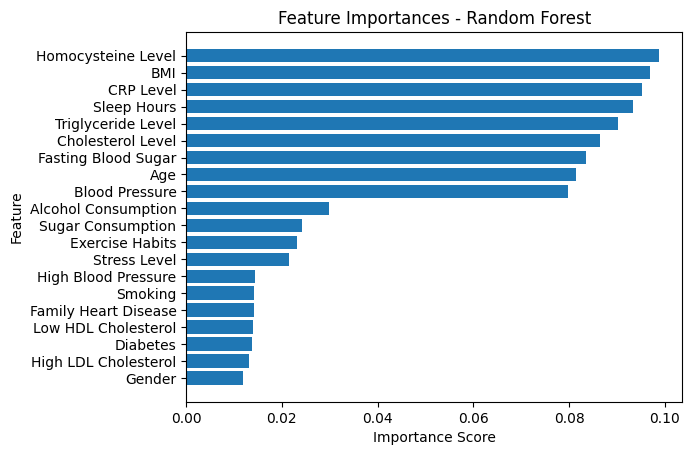

In [35]:
importance = models["Random Forest"].feature_importances_
features = X_train.columns

fi = pd.DataFrame({
    "Feature": features,
    "Importance":importance
}).sort_values(by="Importance",ascending=False)

plt.Figure(figsize=(8,5))
plt.barh(fi["Feature"],fi["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [36]:
df_main.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

# Saving model for Streamlit App

In [37]:
import joblib

joblib.dump(models["Random Forest"],'RandomForest.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']